In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def create_numerics(data):
    # Get nominal columns
    nominal_cols = data.select_dtypes(include='object').columns.tolist()

    # Turn nominal to numeric
    for nom in nominal_cols:
        enc = LabelEncoder()
        enc.fit(data[nom])
        data[nom] = enc.transform(data[nom])

    return data


In [3]:
data = pd.read_excel(r"C:\Users\Chinmay\Documents\GitHub\Hardware-Trojan-Detection\Data\HEROdata2.xlsx")

In [5]:
#pd.DataFrame(data)

In [8]:
 nominal_cols = data.select_dtypes(include='object').columns.tolist()
 print(nominal_cols)

['Label', 'Circuit']


In [9]:
Turn nominal to numeric
for nom in nominal_cols:
    enc = LabelEncoder()
    enc.fit(data[nom])
    data[nom] = enc.transform(data[nom])
pd.DataFrame(data)    

SyntaxError: invalid syntax (<ipython-input-9-a88366c8622c>, line 1)

In [48]:
def prepare_data():
    data = pd.read_excel(r"C:\Users\Chinmay\Documents\GitHub\Hardware-Trojan-Detection\Data\HEROdata2.xlsx")
    data = data.dropna()
    
    #to count no of Trojan free circuits
    trojan_free = data.loc[data['Label']=="'Trojan Free'"].reset_index()    
    
    # balance the ratio between trojan free and infected of the same circuit category
    for i in range(len(trojan_free)):
        category_substring = trojan_free['Circuit'][i].replace("'",'')
        circuit_group = data[data['Circuit'].str.contains(category_substring)]
        
        df1 = circuit_group.iloc[0:1]
        
        if len(circuit_group) > 1:
            data = data.append([df1]*(len(circuit_group)-1), ignore_index=True)
    
    data.drop(columns=['Circuit'], inplace=True)

    data = create_numerics(data)
    
    data = shuffle(data, random_state=42)

    # Create correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features
    data = data.drop(data[to_drop], axis=1)
    
    y = pd.DataFrame(data["Label"]).values
    x = data.drop(["Label"], axis=1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    x = scaler.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    
    """
    # plot the correlated features
    sns.heatmap(
        corr_matrix,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    plt.title("Features correlation")
    plt.show()
    """
    return(x_train, x_test, y_train, y_test)
    data.head()

In [49]:
trojan_free = data.loc[data['Label']=="'Trojan Free'"].reset_index()
pd.DataFrame(trojan_free)

,index,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,...,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label,Circuit
0,0,26623,198177,172368,164960,6850,0,19504,22,173046.832023,...,18253.0000,32696.0000,5135800.0,56082.0000,45560.0,38947.0000,5677500.0,90182.0000,'Trojan Free','AES'
1,22,1505,5343,3890,0,3875,0,0,52,0.000000,...,0.0000,300.3637,0.0,300.3637,0.0,300.3637,0.0,300.3637,'Trojan Free','B15'
2,27,641,103079,102057,0,102048,0,0,50,0.000000,...,0.0000,7893.0000,0.0,7893.0000,0.0,7893.0000,0.0,7893.0000,'Trojan Free','EthernetMAC10GE'
3,32,3587,6993,4748,3523,1195,0,791,17,3910.998028,...,66.1613,108.2187,93667.0,268.0476,3205.2,129.9269,183730.0,3518.8000,'Trojan Free','memctrl'
4,57,249,2407,2157,0,2157,0,0,36,0.000000,...,0.0000,179.3625,0.0,179.3625,0.0,179.3625,0.0,179.3625,'Trojan Free','S15850'
5,59,336,5789,5329,0,5329,0,0,43,0.000000,...,0.0000,742.8379,0.0,742.8379,0.0,742.8379,0.0,742.8379,'Trojan Free','S38417'
6,63,544,7275,6475,0,6475,0,0,40,0.000000,...,0.0000,765.3516,0.0,765.3516,0.0,765.3516,0.0,765.3516,'Trojan Free','S38584'
7,67,711,70139,69216,0,69206,0,0,48,0.000000,...,0.0000,5908.0000,0.0,5908.0000,0.0,5908.0000,0.0,5908.0000,'Trojan Free','VGA_LCD'
8,69,2747,22182,20447,0,20447,0,0,26,0.000000,...,0.0000,1703.4000,0.0,1703.4000,0.0,1703.4000,0.0,1703.4000,'Trojan Free','WB_CONMAX'
9,73,373,920,687,0,687,0,0,3,0.000000,...,0.0000,26.3010,0.0,26.3010,0.0,26.3010,0.0,26.3010,'Trojan Free','C2670'


In [50]:
trojan_infected = data.loc[data['Label']=="'Trojan Infected'"].reset_index()
pd.DataFrame(trojan_infected)

,index,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,...,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label,Circuit
0,1,27289,198776,172486,164991,6934,0,19504,2,173081.678022,...,18260.0,32707.0000,5136600.0,56101.0000,45820.0,38963.0000,5685000.0,90465.0000,'Trojan Infected','AES-T100'
1,2,27545,198893,172468,164973,6934,0,19504,2,173066.250022,...,18257.0,32707.0000,5136200.0,56097.0000,45851.0,38965.0000,5685000.0,90498.0000,'Trojan Infected','AES-T200'
2,3,28033,198562,172369,164960,6850,0,19504,1,173046.832023,...,18250.0,32693.0000,5135800.0,56076.0000,45553.0,38942.0000,5677500.0,90170.0000,'Trojan Infected','AES-T300'
3,4,27325,199431,172899,165330,7007,0,19518,3,173451.418025,...,18286.0,32727.0000,5144100.0,56154.0000,45725.0,38982.0000,5701100.0,90405.0000,'Trojan Infected','AES-T400'
4,5,27009,198562,172369,164960,6850,0,19504,1,173046.832023,...,18250.0,32693.0000,5135800.0,56076.0000,45553.0,38942.0000,5677500.0,90170.0000,'Trojan Infected','AES-T500'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,902,359,8376,6866,0,6866,0,0,27,0.000000,...,0.0,726.6476,0.0,726.6476,0.0,726.6476,0.0,726.6476,'Trojan Infected','S35932-T615'
882,903,359,8373,6863,0,6863,0,0,26,0.000000,...,0.0,726.4709,0.0,726.4709,0.0,726.4709,0.0,726.4709,'Trojan Infected','S35932-T616'
883,904,359,8374,6864,0,6864,0,0,26,0.000000,...,0.0,726.5132,0.0,726.5132,0.0,726.5132,0.0,726.5132,'Trojan Infected','S35932-T617'
884,905,359,8378,6868,0,6868,0,0,25,0.000000,...,0.0,726.6879,0.0,726.6879,0.0,726.6879,0.0,726.6879,'Trojan Infected','S35932-T618'


In [52]:
data = pd.read_excel(r"C:\Users\Chinmay\Documents\GitHub\Hardware-Trojan-Detection\Data\HEROdata2.xlsx")
data = data.dropna()
    
    #to count no of Trojan free circuits
trojan_free = data.loc[data['Label']=="'Trojan Free'"].reset_index()    
    
    # balance the ratio between trojan free and infected of the same circuit category
for i in range(len(trojan_free)):
    category_substring = trojan_free['Circuit'][i].replace("'",'')
    circuit_group = data[data['Circuit'].str.contains(category_substring)]
        
    df1 = circuit_group.iloc[0:1]
        
    if len(circuit_group) > 1:
        data = data.append([df1]*(len(circuit_group)-1), ignore_index=True)
    
data.drop(columns=['Circuit'], inplace=True)

data = create_numerics(data)
pd.DataFrame(data)
data = shuffle(data, random_state=42)



In [53]:
data = pd.read_excel(r"C:\Users\Chinmay\Documents\GitHub\Hardware-Trojan-Detection\Data\HEROdata2.xlsx")
data = data.dropna()
    
    #to count no of Trojan free circuits
trojan_free = data.loc[data['Label']=="'Trojan Free'"].reset_index()    
    
    # balance the ratio between trojan free and infected of the same circuit category
for i in range(len(trojan_free)):
    category_substring = trojan_free['Circuit'][i].replace("'",'')
    circuit_group = data[data['Circuit'].str.contains(category_substring)]
        
    df1 = circuit_group.iloc[0:1]
        
    if len(circuit_group) > 1:
        data = data.append([df1]*(len(circuit_group)-1), ignore_index=True)
    
data.drop(columns=['Circuit'], inplace=True)

data = create_numerics(data)
#pd.DataFrame(data)
data = shuffle(data, random_state=42)
pd.DataFrame(data)

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Sequential Total Power,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label
1206,72,1184,1134,0,1134,0,0,3,0.0,0.0,...,0.0,0.0,47.6522,0.0,47.6522,0.0,47.6522,0.0,47.6522,0
256,72,1190,1140,0,1140,0,0,8,0.0,0.0,...,0.0,0.0,48.0107,0.0,48.0107,0.0,48.0107,0.0,48.0107,1
2466,249,2407,2157,0,2157,0,0,36,0.0,0.0,...,0.0,0.0,179.3625,0.0,179.3625,0.0,179.3625,0.0,179.3625,0
175,72,1191,1141,0,1141,0,0,9,0.0,0.0,...,0.0,0.0,48.1425,0.0,48.1425,0.0,48.1425,0.0,48.1425,1
211,72,1193,1143,0,1143,0,0,6,0.0,0.0,...,0.0,0.0,48.0937,0.0,48.0937,0.0,48.0937,0.0,48.0937,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,26,563,479,0,479,0,0,17,0.0,0.0,...,0.0,0.0,28.6954,0.0,28.6954,0.0,28.6954,0.0,28.6954,0
1095,373,920,687,0,687,0,0,3,0.0,0.0,...,0.0,0.0,26.3010,0.0,26.3010,0.0,26.3010,0.0,26.3010,0
1130,373,920,687,0,687,0,0,3,0.0,0.0,...,0.0,0.0,26.3010,0.0,26.3010,0.0,26.3010,0.0,26.3010,0
1294,301,2485,2307,0,2307,0,0,15,0.0,0.0,...,0.0,0.0,98.9223,0.0,98.9223,0.0,98.9223,0.0,98.9223,0


In [40]:
    # Create correlation matrix
    corr_matrix = data.corr().abs()
pd.DataFrame(corr_matrix)

,Number of ports,Number of nets,Number of cells,Number of combinational cells,Number of sequential cells,Number of macros/black boxes,Number of buf/inv,Number of references,Combinational area,Buf/Inv area,...,Sequential Total Power,Combinational Internal Power,Combinational Switching Power,Combinational Leakage Power,Combinational Total Power,Total Internal Power,Total Switching Power,Total Leakage Power,Total Total Power,Label
Number of ports,1.000000,0.957462,0.944845,0.981364,0.098742,NaN,0.981918,0.095603,0.981686,0.982247,...,0.200158,0.979028,0.972990,0.980645,0.977593,0.980400,0.974835,0.980775,0.979451,0.054882
Number of nets,0.957462,1.000000,0.999111,0.966517,0.335595,NaN,0.966564,0.058773,0.966551,0.966597,...,0.186578,0.966182,0.990369,0.966426,0.982264,0.966274,0.987537,0.966426,0.976888,0.056506
Number of cells,0.944845,0.999111,1.000000,0.958005,0.366317,NaN,0.957984,0.055871,0.957997,0.957973,...,0.183857,0.957964,0.986059,0.958007,0.976296,0.957889,0.982619,0.957993,0.969987,0.055520
Number of combinational cells,0.981364,0.966517,0.958005,1.000000,0.084116,NaN,0.999987,0.103158,0.999998,0.999980,...,0.194087,0.999919,0.991726,0.999992,0.997124,0.999911,0.994113,0.999990,0.998871,0.052523
Number of sequential cells,0.098742,0.335595,0.366317,0.084116,1.000000,NaN,0.084082,0.140580,0.084092,0.084067,...,0.009058,0.084244,0.208460,0.084150,0.157015,0.084002,0.188762,0.084105,0.129421,0.022471
Number of macros/black boxes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of buf/inv,0.981918,0.966564,0.957984,0.999987,0.084082,NaN,1.000000,0.103262,0.999990,0.999998,...,0.195355,0.999860,0.991653,0.999967,0.997060,0.999923,0.994039,0.999977,0.998844,0.052638
Number of references,0.095603,0.058773,0.055871,0.103158,0.140580,NaN,0.103262,1.000000,0.103135,0.103260,...,0.026212,0.103179,0.082574,0.103164,0.091338,0.103243,0.085987,0.103193,0.095931,0.051299
Combinational area,0.981686,0.966551,0.957997,0.999998,0.084092,NaN,0.999990,0.103135,1.000000,0.999986,...,0.194511,0.999893,0.991692,0.999983,0.997095,0.999905,0.994078,0.999984,0.998852,0.052635
Buf/Inv area,0.982247,0.966597,0.957973,0.999980,0.084067,NaN,0.999998,0.103260,0.999986,1.000000,...,0.195508,0.999830,0.991615,0.999952,0.997026,0.999908,0.994001,0.999964,0.998819,0.052694


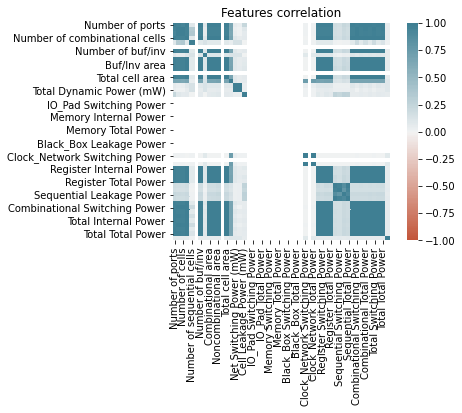

In [38]:
sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Features correlation")
plt.show()